# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

Me ayudaría a resolver la problemática : el precio, tipo de propiedad, ubicación, , habitaciones, antigüedad.

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

sns.set()

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [2]:
dataset = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
dataset.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [3]:
#Exploramos filas y columnas
print("Cantidad de filas y columnas:",dataset.shape)
print("Nombre de las columnas:",dataset.columns)

Cantidad de filas y columnas: (146660, 19)
Nombre de las columnas: Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')


In [4]:
#Renombramos columnas por valores más entendibles
dataset = dataset.rename(columns = {"l1": "Country", "l2": "State", "l3": "Neighborhood"})

In [5]:
dataset.head()

,start_date,end_date,created_on,lat,lon,Country,State,Neighborhood,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [6]:
#Valores faltantes por columnas
print(dataset.isna().sum())

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
Country                0
State                  0
Neighborhood           0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64


3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [7]:
#Análisis de tipos de propiedades
print("Cant de tipos de propiedad:", len(dataset["property_type"].unique()))
print("Lista tipos:", dataset["property_type"].unique().tolist())

Cant de tipos de propiedad: 10
Lista tipos: ['Departamento', 'PH', 'Casa', 'Lote', 'Casa de campo', 'Oficina', 'Otro', 'Local comercial', 'Cochera', 'Depósito']


In [8]:
#Cantidad de propiedades por cada tipo de propiedad
count =  dataset["property_type"].value_counts()
print(count)

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64


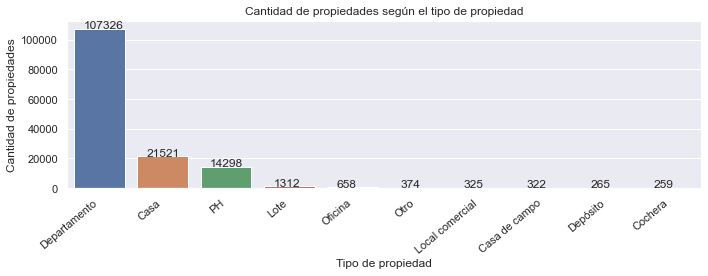

In [9]:
#Grafico de cantidad de propiedades por cada tipo de propiedad
plt.figure(figsize=(10,4)) 
ax = sns.countplot(x = dataset["property_type"], 
                   order = dataset["property_type"].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
for p, label in zip(ax.patches, dataset["property_type"].value_counts()):
    ax.annotate(label, (p.get_x()+0.150, p.get_height()+0.15))
plt.xlabel("Tipo de propiedad")
plt.ylabel("Cantidad de propiedades")
plt.title("Cantidad de propiedades según el tipo de propiedad")
plt.tight_layout()
plt.show()

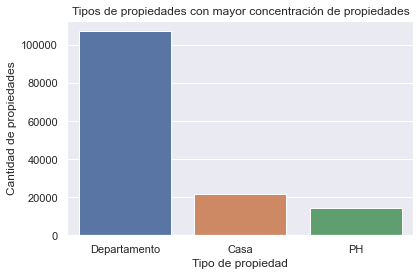

In [10]:
#Grafico de los tipos de propiedades con la mayor concentración de propiedades 
lista_de_tipos_mayor =  ["Departamento", "PH", "Casa"]
dataset_mayor = dataset[dataset["property_type"].isin(lista_de_tipos_mayor)]
dataset_mayor
sns.countplot(data=dataset_mayor, x="property_type", order = dataset_mayor["property_type"].value_counts().index)
plt.xlabel("Tipo de propiedad")
plt.ylabel("Cantidad de propiedades")
plt.title("Tipos de propiedades con mayor concentración de propiedades")
plt.tight_layout()
plt.show()

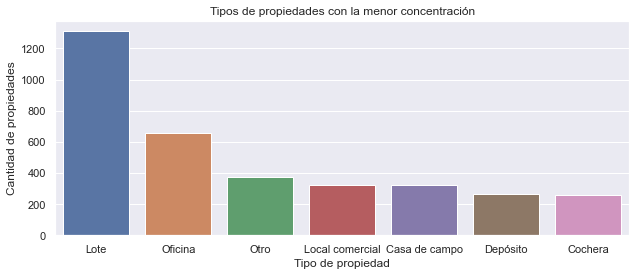

In [11]:
# Grafico de los tipos de propiedades con la menor concentración de propiedades 
lista_de_tipos_menor =  ['Lote','Casa de campo', 'Oficina', 'Otro', 'Local comercial', 'Cochera', 'Depósito']
data_type_menor = dataset[dataset["property_type"].isin(lista_de_tipos_menor)]
data_type_menor
plt.figure(figsize=(9,4)) 
ax = sns.countplot(data=data_type_menor, x="property_type", order = data_type_menor["property_type"].value_counts().index)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha="center")
plt.xlabel("Tipo de propiedad")
plt.ylabel("Cantidad de propiedades")
plt.title("Tipos de propiedades con la menor concentración")
plt.tight_layout()
plt.show()

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

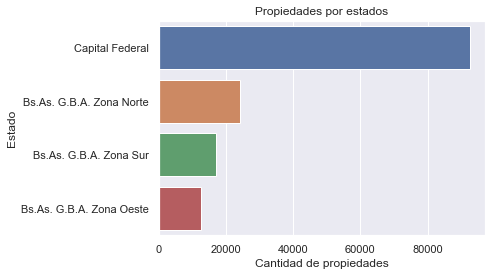

In [12]:
#Grafico de cantidad de propiedades por Estados 
plt.figure(figsize=(7,4)) 
ax = sns.countplot(data=dataset, y="State", order = dataset["State"].value_counts().index)
plt.xlabel("Cantidad de propiedades")
plt.ylabel("Estado")
plt.title("Propiedades por estados")
plt.tight_layout()
plt.show()

In [13]:
#Cantidad de Barrios
print("Cantidad de barrios:", len(dataset["Neighborhood"].unique()))

Cantidad de barrios: 89


In [14]:
#Cantidad de propiedades por cada barrio
neighborhood_count = dataset["Neighborhood"].value_counts().rename_axis('Neighborhood').reset_index(name='counts')
neighborhood_count

,Neighborhood,counts
0,Palermo,13073
1,Tigre,8718
2,Almagro,7527
3,Belgrano,6935
4,Caballito,6650
...,...,...
84,Cañuelas,108
85,Villa Soldati,69
86,Villa Riachuelo,42
87,Marcos Paz,35


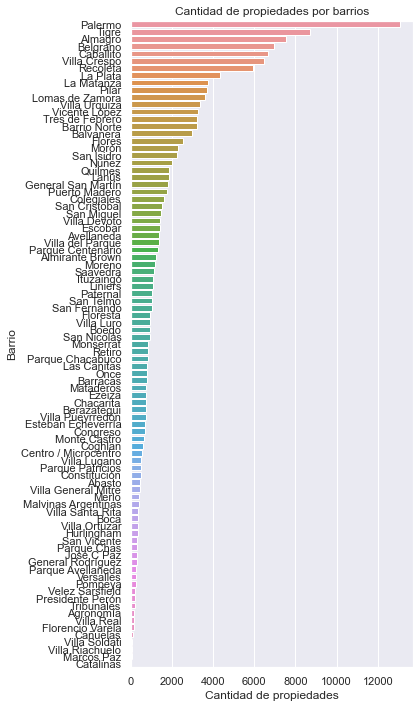

In [15]:
#Se puede analizar que solo en el 20% de los barrios contienen más del 60% de las propiedades totales
plt.figure(figsize=(6,10)) 
ax = sns.barplot(data=neighborhood_count, y="Neighborhood", x = "counts")
plt.ylabel("Barrio")
plt.xlabel("Cantidad de propiedades")
plt.title("Cantidad de propiedades por barrios")
plt.tight_layout()
plt.show()

In [16]:
#Se dificulta la visualización del grafico anterior al tener muchos barrios
#Por lo que se decide filtrar por los barrios que concentran la mayor cantidad de propiedades
#Analizando el gráfico anterior se selecciona el valor 2300 para el filtrado de los barrios con mayor concentración de propiedades
#Ya que es notable que los valores mayor a 2300 están distribuidos en pocos barrios y contienen el porcentaje mayor de propiedades
#Y los valores menores a 2300, son muchos de manera decreciente y muy continuos hasta llegar a 0.

In [17]:
barrios_mayores = neighborhood_count[neighborhood_count["counts"] >= 2300]
lista_barrios = barrios_mayores["Neighborhood"].unique().tolist()

In [18]:
dataset_listamayor = dataset[dataset["Neighborhood"].isin(lista_barrios)]
dataset_listamayor.head(3)

,start_date,end_date,created_on,lat,lon,Country,State,Neighborhood,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [19]:
print("Cantidad de barrios con la mayor concentración de propiedades:",len(lista_barrios))
print("Tamaño del nuevo dataset filtrado:",dataset_listamayor.shape)

Cantidad de barrios con la mayor concentración de propiedades: 18
Tamaño del nuevo dataset filtrado: (91652, 19)


<ipython-input-20-fe141d476be7>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


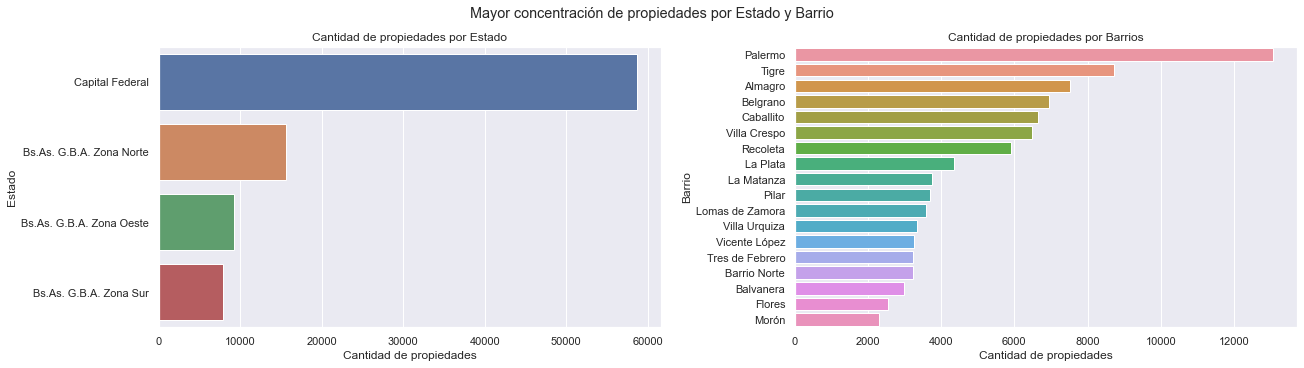

In [20]:
fig, ax = plt.subplots(1,2, figsize=(18,5),constrained_layout = True)
sns.countplot(y = dataset_listamayor['State'], ax=ax[0], order = dataset_listamayor["State"].value_counts().index)
ax[0].set_title("Cantidad de propiedades por Estado")
ax[0].set_xlabel('Cantidad de propiedades')
ax[0].set_ylabel('Estado')
sns.countplot(y = dataset_listamayor['Neighborhood'], ax=ax[1], order = dataset_listamayor["Neighborhood"].value_counts().index)
ax[1].set_title("Cantidad de propiedades por Barrios")
ax[1].set_xlabel('Cantidad de propiedades')
ax[1].set_ylabel('Barrio')
plt.suptitle("Mayor concentración de propiedades por Estado y Barrio")
fig.show()

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [21]:
#Se filtra por los barrios dentro de Capital Federal que concentran la mayor cantidad de propiedades 
lista_de_tipos_mayor =  ["Departamento", "PH", "Casa"]
nuevo_ds = dataset[(dataset["property_type"].isin(lista_de_tipos_mayor)) & (dataset['State'] == 'Capital Federal')]
nuevo_ds.shape

(91485, 19)

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

In [22]:
#Se seleccionan las columnas que se van a analizar
new_ds = nuevo_ds[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price','property_type','Neighborhood']]
new_ds.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,Neighborhood
0,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento,San Cristobal
1,2.0,1.0,2.0,70.0,58.0,159000.0,PH,Boedo
2,2.0,1.0,1.0,45.0,45.0,125000.0,PH,Palermo
3,2.0,1.0,1.0,85.0,50.0,295000.0,PH,Palermo
5,2.0,1.0,1.0,56.0,56.0,150000.0,PH,Villa Crespo


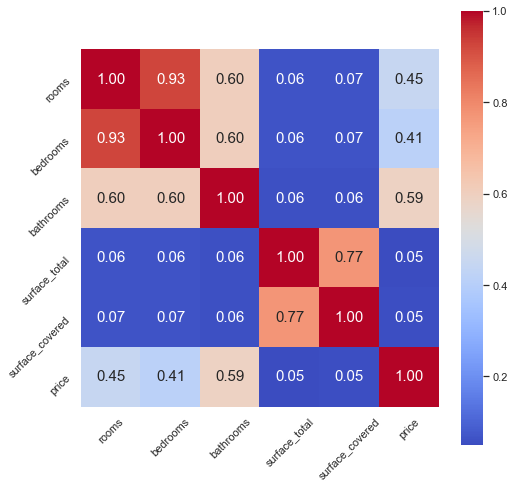

In [23]:
#Mapa de calor de las variables numericas
corr = new_ds.drop(columns = ['property_type', 'Neighborhood']).corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= new_ds.drop(columns = ['property_type', 'Neighborhood']).columns,
           yticklabels= new_ds.drop(columns = ['property_type', 'Neighborhood']).columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [24]:
#Analizo las variables sin sentido (más alejadas de 1): 'surface_total' y 'surface_covered'

Text(0.5, 8.95999999999998, 'Superficie total')

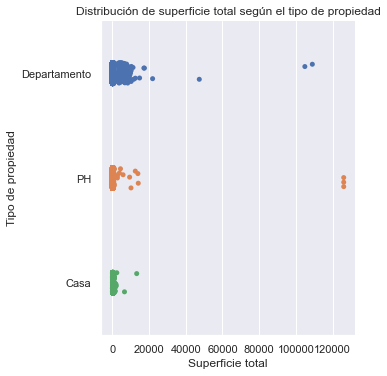

In [25]:
#Se grafica la distribución de la superficie total según los tipos de propiedades
sns.catplot(data = new_ds, x = "surface_total", y = "property_type")
plt.title('Distribución de superficie total según el tipo de propiedad')
plt.ylabel('Tipo de propiedad')
plt.xlabel('Superficie total')

Text(0.5, 0, 'Superficie total')

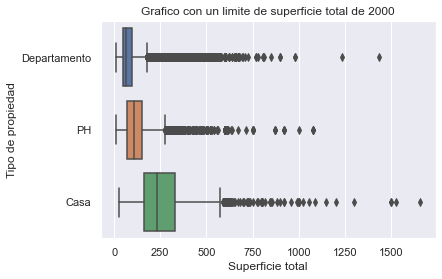

In [26]:
#Según el gráfico anterior se puede analizar que la concentración de los datos se encuentra dentro del primer cuadrante (20.000 de superficie total)
#Se grafican boxplots para analizar outliers
sns.boxplot(data = new_ds[new_ds['surface_total'] < 2000], y = "property_type", x = "surface_total")
plt.title('Grafico con un limite de superficie total de 2000')
plt.ylabel('Tipo de propiedad')
plt.xlabel('Superficie total')

Text(0.5, 0, 'Superficie total')

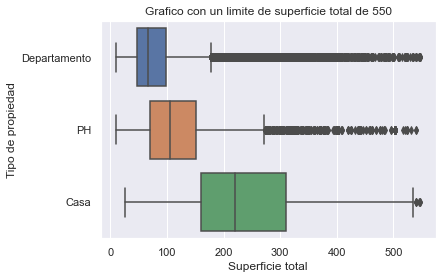

In [27]:
#Se puede analizar que la propiedad con mayor superficie total es Casa
sns.boxplot(data = new_ds[new_ds['surface_total'] < 550], y = "property_type", x = "surface_total")
plt.title('Grafico con un limite de superficie total de 550')
plt.ylabel('Tipo de propiedad')
plt.xlabel('Superficie total')

In [28]:
# Se crean nuevos data set según el tipo de propiedad 
ds_ph = new_ds[new_ds["property_type"].isin(['PH'])]
ds_depto = new_ds[new_ds["property_type"].isin(['Departamento'])]
ds_casa = new_ds[new_ds["property_type"].isin(['Casa'])]

In [29]:
def get_iqr_values(df_in, col_name):
    median = df_in[col_name].median()
    q1 = df_in[col_name].quantile(0.25) # 1st quartile
    q3 = df_in[col_name].quantile(0.75) # 3rd quartile
    iqr = q3-q1 #Interquantile range
    minimum  = q1-1.5*iqr # The minimum value or the |- marker in the box plot
    maximum = q3+1.5*iqr # The maximum value or the -| marker in the box plot
    print("- Valor minimo:", minimum)
    print("- Valor maximo:", maximum)

In [30]:
#Se obtienen los valores maximos y medios de cada propiedad
print("Valores de tipo de propiedad PH:")
get_iqr_values(ds_ph, 'surface_total')
print("----------------------------------")
print("Valores de tipo de propiedad Depto:")
get_iqr_values(ds_depto, 'surface_total')
print("----------------------------------")
print("Valores de tipo de propiedad Casa:")
get_iqr_values(ds_casa, 'surface_total')

Valores de tipo de propiedad PH:
- Valor minimo: -53.0
- Valor maximo: 275.0
----------------------------------
Valores de tipo de propiedad Depto:
- Valor minimo: -31.0
- Valor maximo: 177.0
----------------------------------
Valores de tipo de propiedad Casa:
- Valor minimo: -85.0
- Valor maximo: 579.0


In [31]:
#Se eliminan los outliers según los valores máximos de cada propiedad obtenidos anteriormente
#Los valores minimos al ser negativos, se filtran los mayores a 0
#Y se filtran los valores menores al valor máximo de cada tipo de propiedad.
print("Tamaño del data set con outliers:", len(new_ds))
print("--------------------------------------------------------------------")
print("Cantidad de propiedades de tipo PH antes de eliminar outliers",ds_ph.shape)
new_ds_ph = ds_ph[(ds_ph['surface_total'] <= 275) & (ds_ph['surface_total'] >= 0)]
print("Cantidad de propiedades de tipo PH después de eliminar outliers",new_ds_ph.shape)
print("--------------------------------------------------------------------")
print("Cantidad de propiedades de tipo Depto antes de eliminar outliers",ds_depto.shape)
new_ds_depto = ds_depto[(ds_depto['surface_total'] <= 177) & (ds_depto['surface_total'] >= 0)]
print("Cantidad de propiedades de tipo Depto después de eliminar outliers",new_ds_depto.shape)
print("--------------------------------------------------------------------")
print("Cantidad de propiedades de tipo Casa antes de eliminar outliers",ds_casa.shape)
new_ds_casa = ds_casa[(ds_casa['surface_total'] <= 579) & (ds_casa['surface_total'] >= 0)]
print("Cantidad de propiedades de tipo Casa después de eliminar outliers",new_ds_casa.shape)

long_ph = len(new_ds_ph)
long_depto = len(new_ds_depto)
long_casa = len(new_ds_casa)
new_long = long_ph + long_depto + long_casa
print("--------------------------------------------------------------------")
print("Tamaño del nuevo data set sin outliers:", new_long)

Tamaño del data set con outliers: 91485
--------------------------------------------------------------------
Cantidad de propiedades de tipo PH antes de eliminar outliers (9764, 8)
Cantidad de propiedades de tipo PH después de eliminar outliers (8999, 8)
--------------------------------------------------------------------
Cantidad de propiedades de tipo Depto antes de eliminar outliers (79029, 8)
Cantidad de propiedades de tipo Depto después de eliminar outliers (65376, 8)
--------------------------------------------------------------------
Cantidad de propiedades de tipo Casa antes de eliminar outliers (2692, 8)
Cantidad de propiedades de tipo Casa después de eliminar outliers (2166, 8)
--------------------------------------------------------------------
Tamaño del nuevo data set sin outliers: 76541


In [32]:
#Se concatenan los data set sin outliers
frames = [new_ds_ph,new_ds_depto,new_ds_casa]
dataset_clear = pd.concat(frames)
dataset_clear.shape
dataset_clear

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,Neighborhood
1,2.0,1.0,2.0,70.0,58.0,159000.0,PH,Boedo
2,2.0,1.0,1.0,45.0,45.0,125000.0,PH,Palermo
3,2.0,1.0,1.0,85.0,50.0,295000.0,PH,Palermo
5,2.0,1.0,1.0,56.0,56.0,150000.0,PH,Villa Crespo
6,2.0,1.0,1.0,70.0,70.0,159500.0,PH,Villa Crespo
...,...,...,...,...,...,...,...,...
145548,4.0,3.0,3.0,138.0,100.0,310000.0,Casa,Flores
145556,3.0,3.0,2.0,160.0,86.0,220000.0,Casa,Chacarita
145557,4.0,3.0,2.0,205.0,125.0,175000.0,Casa,Mataderos
145610,4.0,4.0,1.0,162.0,NaN,395000.0,Casa,Colegiales


Cantidad de propiedades totales (76541, 8)


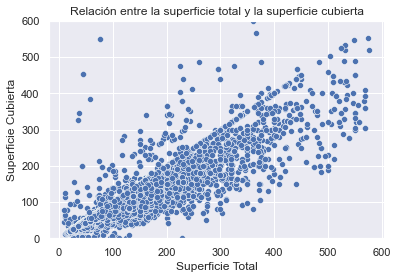

In [33]:
#Se grafica la relación entre la superficie cubierta con la superficie total. 
dataset_clear
sns.scatterplot(x=dataset_clear["surface_total"], y=dataset_clear["surface_covered"], data = dataset_clear)
plt.title('Relación entre la superficie total y la superficie cubierta')
plt.xlabel('Superficie Total')
plt.ylabel('Superficie Cubierta')
plt.ylim(0,600)
print("Cantidad de propiedades totales",dataset_clear.shape)

Cantidad de propiedades con superficie cubierta no mayor a la total (75299, 8)


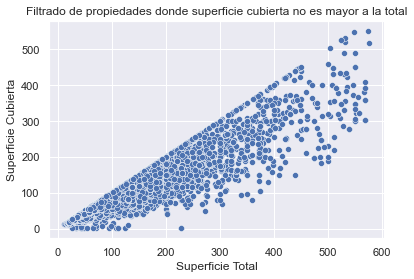

In [34]:
#Se filtran las propiedades que tienen una superficie cubierta mayor a la superficie total.
dataset_clear = dataset_clear[dataset_clear['surface_covered'] <= dataset_clear['surface_total']]
sns.scatterplot(x="surface_total", y="surface_covered", data = dataset_clear)
plt.title('Filtrado de propiedades donde superficie cubierta no es mayor a la total')
plt.xlabel('Superficie Total')
plt.ylabel('Superficie Cubierta')
print("Cantidad de propiedades con superficie cubierta no mayor a la total",dataset_clear.shape)

In [35]:
#Se analiza si todos los tipos de moneda son en dólares
dataset['currency'].unique().tolist()

['USD']

Text(0.5, 1.0, 'Cantidad de propiedades por precio')

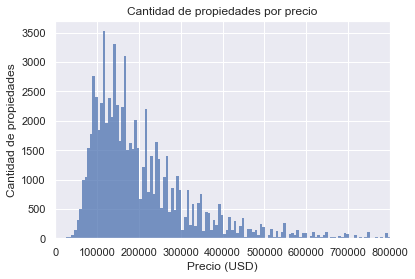

In [36]:
#Se analiza la distribución del precio
#La mayor cantidad de propiedades tienen un precio entre 100.000 y 200.000 
#Es poca la cantidad de propiedades que tienen precios mayores a 400.000
sns.histplot(dataset_clear['price']);
plt.xlim(0,800000)
plt.xlabel('Precio (USD)')
plt.ylabel('Cantidad de propiedades')
plt.title('Cantidad de propiedades por precio')

In [37]:
#Se analiza la variable precio en las propiedades
dataset_clear['price'].describe().apply("{0:.5f}".format)

count       75299.00000
mean       211846.25595
std        187015.63656
min          7500.00000
25%        120000.00000
50%        170000.00000
75%        252000.00000
max      32434232.00000
Name: price, dtype: object

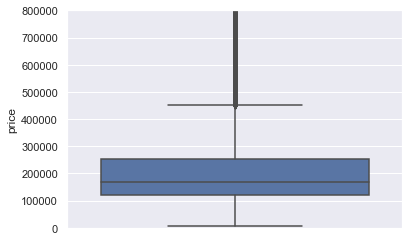

In [38]:
#Al graficar un boxplot podemos visualizar los datos anteriores:
#- La media es: 211.846
#- El precio maximo: 32.434.232
#- El precio mínimo: 7.500
#- 1er quantile: 120.000
#- 3er quantile: 252.000
plt.ylim(0,800000)
ax = sns.boxplot(y=dataset_clear['price'])

/opt/miniconda3/envs/datascience/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 700000.0)

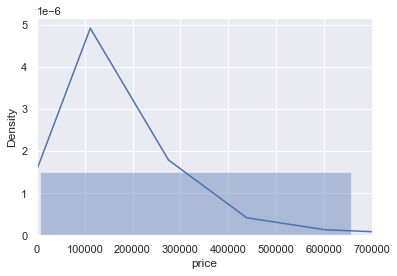

In [39]:
#La mayor densidad de propiedades es en valor 100.000
sns.distplot(dataset_clear['price']);
plt.xlim(0,700000)

<ipython-input-40-0ffbdbb30fbd>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


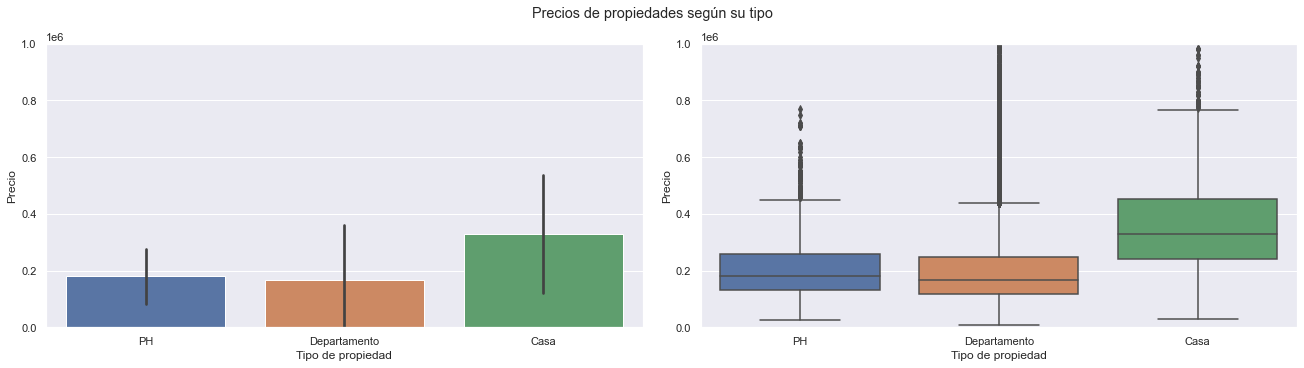

In [40]:
#Graficar la distribución del precio según el tipo de propiedad

fig, ax = plt.subplots(1,2, figsize=(18,5),constrained_layout = True)
sns.barplot(data = dataset_clear, x="property_type", y="price", estimator=np.median, ci='sd',ax=ax[0])
ax[0].set_xlabel('Tipo de propiedad')
ax[0].set_ylabel('Precio')
ax[0].set_ylim(0,1000000)
sns.boxplot(data = dataset_clear, x = 'property_type', y = 'price',ax=ax[1])
ax[1].set_xlabel('Tipo de propiedad')
ax[1].set_ylabel('Precio')
ax[1].set_ylim(0,1000000)
plt.suptitle("Precios de propiedades según su tipo")
fig.show()

In [41]:
#Filtrado de outliers basandonos en el tipo de propiedad

#Nuevos data set según el tipo de propiedad 
ds_ph_clear = dataset_clear[dataset_clear["property_type"] == 'PH']
ds_depto_clear = dataset_clear[dataset_clear["property_type"] == 'Departamento']
ds_casa_clear = dataset_clear[dataset_clear["property_type"] == 'Casa']
#Analizamos los valores maximos y minimos de cada dataset:
print("Valores de tipo de propiedad PH:")
get_iqr_values(ds_ph_clear, 'price')
print("----------------------------------")
print("Valores de tipo de propiedad Depto:")
get_iqr_values(ds_depto_clear, 'price')
print("----------------------------------")
print("Valores de tipo de propiedad Casa:")
get_iqr_values(ds_casa_clear, 'price')

Valores de tipo de propiedad PH:
- Valor minimo: -60000.0
- Valor maximo: 452000.0
----------------------------------
Valores de tipo de propiedad Depto:
- Valor minimo: -73000.0
- Valor maximo: 439000.0
----------------------------------
Valores de tipo de propiedad Casa:
- Valor minimo: -80625.0
- Valor maximo: 774375.0


In [42]:
#Filtramos los data set según los valores maximos y minimos calculados anteriormente
#Los valores minimos al ser negativos, se filtran los mayores a 0
#Y se filtran los valores menores al valor máximo de cada tipo de propiedad.
print("Tamaño del data set con outliers en precio:", len(dataset_clear))
print("--------------------------------------------------------------------")
print("Cantidad de propiedades de tipo PH antes de eliminar outliers",ds_ph_clear.shape)
new_ds_ph_clear = ds_ph_clear[(ds_ph_clear['price'] <= 452000) & (ds_ph_clear['surface_total'] >= 0)]
print("Cantidad de propiedades de tipo PH después de eliminar outliers",new_ds_ph_clear.shape)
print("--------------------------------------------------------------------")
print("Cantidad de propiedades de tipo Depto antes de eliminar outliers",ds_depto_clear.shape)
new_ds_depto_clear = ds_depto_clear[(ds_depto_clear['price'] <= 439000) & (ds_depto_clear['surface_total'] >= 0)]
print("Cantidad de propiedades de tipo Depto después de eliminar outliers",new_ds_depto_clear.shape)
print("--------------------------------------------------------------------")
print("Cantidad de propiedades de tipo Casa antes de eliminar outliers",ds_casa_clear.shape)
new_ds_casa_clear = ds_casa_clear[(ds_casa_clear['price'] <= 774375) & (ds_casa_clear['surface_total'] >= 0)]
print("Cantidad de propiedades de tipo Casa después de eliminar outliers",new_ds_casa_clear.shape)

long_ph_clear = len(new_ds_ph_clear)
long_depto_clear = len(new_ds_depto_clear)
long_casa_clear = len(new_ds_casa_clear)
new_long_clear = long_ph_clear + long_depto_clear + long_casa_clear
print("--------------------------------------------------------------------")
print("Tamaño del nuevo data set sin outliers en precio:", new_long_clear)

Tamaño del data set con outliers en precio: 75299
--------------------------------------------------------------------
Cantidad de propiedades de tipo PH antes de eliminar outliers (8907, 8)
Cantidad de propiedades de tipo PH después de eliminar outliers (8751, 8)
--------------------------------------------------------------------
Cantidad de propiedades de tipo Depto antes de eliminar outliers (64442, 8)
Cantidad de propiedades de tipo Depto después de eliminar outliers (60407, 8)
--------------------------------------------------------------------
Cantidad de propiedades de tipo Casa antes de eliminar outliers (1950, 8)
Cantidad de propiedades de tipo Casa después de eliminar outliers (1862, 8)
--------------------------------------------------------------------
Tamaño del nuevo data set sin outliers en precio: 71020


In [43]:
#Se concatenan los data set sin outliers
frames_clear = [new_ds_ph_clear,new_ds_depto_clear,new_ds_casa_clear]
dataset_clear = pd.concat(frames_clear)
print(dataset_clear.shape)
dataset_clear

(71020, 8)


,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,Neighborhood
1,2.0,1.0,2.0,70.0,58.0,159000.0,PH,Boedo
2,2.0,1.0,1.0,45.0,45.0,125000.0,PH,Palermo
3,2.0,1.0,1.0,85.0,50.0,295000.0,PH,Palermo
5,2.0,1.0,1.0,56.0,56.0,150000.0,PH,Villa Crespo
6,2.0,1.0,1.0,70.0,70.0,159500.0,PH,Villa Crespo
...,...,...,...,...,...,...,...,...
145547,5.0,3.0,3.0,190.0,155.0,259500.0,Casa,Flores
145548,4.0,3.0,3.0,138.0,100.0,310000.0,Casa,Flores
145556,3.0,3.0,2.0,160.0,86.0,220000.0,Casa,Chacarita
145557,4.0,3.0,2.0,205.0,125.0,175000.0,Casa,Mataderos


Text(0.5, 0, 'Barrio de Capital Federal')

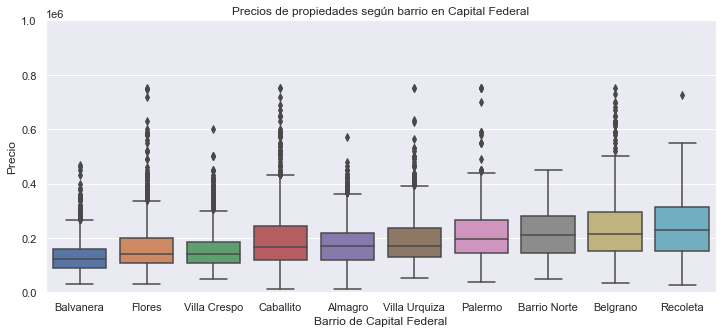

In [44]:
#Se grafican los barrios con mayor concentración de propiedades dentro de Capital Federal
#Ordenados de menor valor de media, a mayor valor de media.
dataset_clear_mayor = dataset_clear[dataset_clear["Neighborhood"].isin(lista_barrios)]
grouped = dataset_clear_mayor.loc[:,['Neighborhood', 'price']] \
    .groupby(['Neighborhood']) \
    .median() \
    .sort_values(by='price')
plt.figure(figsize=(12,5)) 
sns.boxplot(data = dataset_clear_mayor, x = 'Neighborhood', y = 'price', order=grouped.index)
plt.ylim(0,1000000)
plt.title('Precios de propiedades según barrio en Capital Federal')
plt.ylabel('Precio')
plt.xlabel('Barrio de Capital Federal')

Text(0, 0.5, 'Precio')

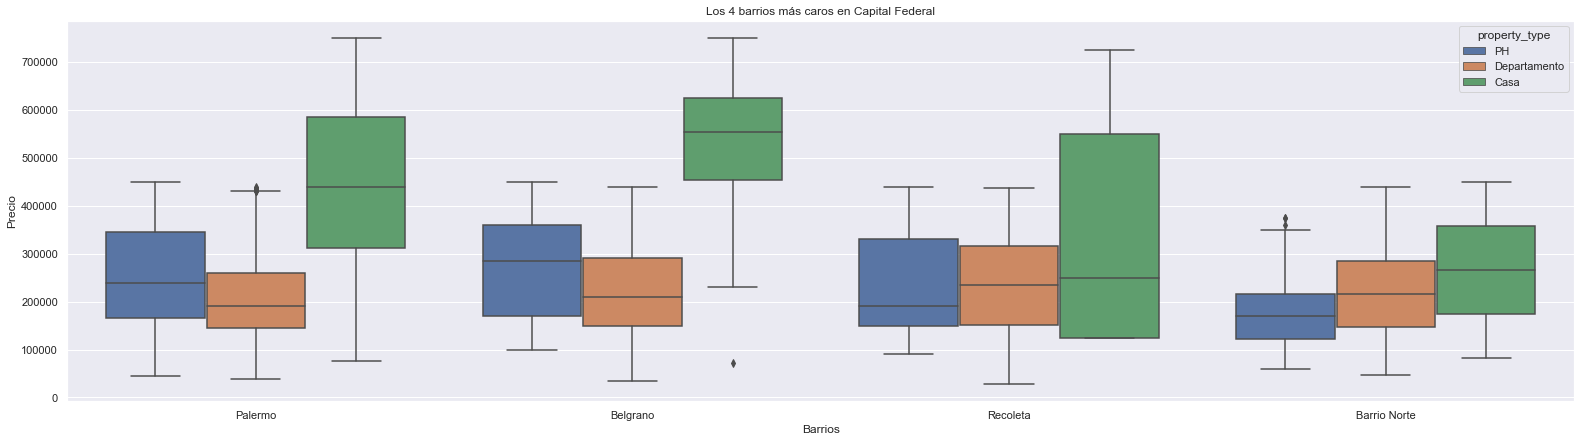

In [45]:
#Se analizan los 4 barrios más caros en Capital Federal según el tipo de propiedad
lista_top4_barrios = ['Recoleta', 'Belgrano', 'Palermo', 'Barrio Norte']
top4_barrios_precio = dataset_clear[dataset_clear["Neighborhood"].isin(lista_top4_barrios)]

plt.figure(figsize=(27,7))
plt.title('Los 4 barrios más caros en Capital Federal')
ax = sns.boxplot(x="Neighborhood", y="price", hue="property_type",
                 data=top4_barrios_precio)
plt.xlabel('Barrios')
plt.ylabel('Precio')
#Se puede analizar que:
#Las casas en Belgrano son las propiedades que tienen el valor de media más alto
#Y los PH en Barrio Norte son las propiedades que tienen el valor de media más bajo

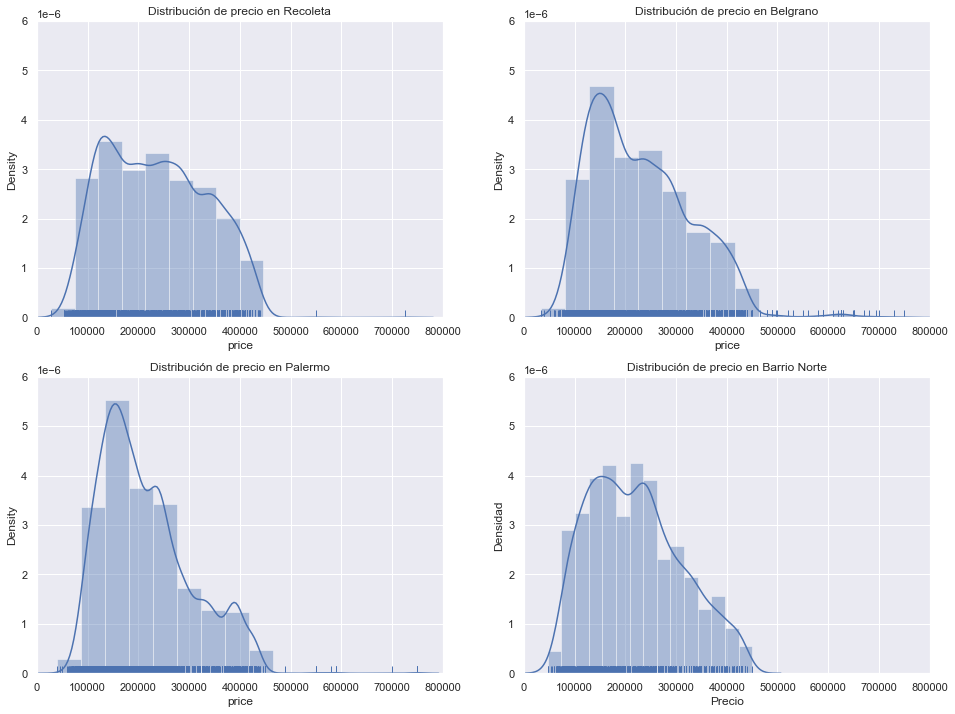

In [46]:
#Se grafica la distribución del precio en los 4 barrios más caros de Capital Federal
warnings.filterwarnings("ignore")
plt.subplots(2, 2, figsize=(16, 12), sharex=True, sharey=True)
barrios = ['Recoleta', 'Belgrano', 'Palermo', 'Barrio Norte']
i = 0
for barrio in barrios:
    i = i + 1
    plt.subplot(2,2,i)
    dataset = dataset_clear[dataset_clear["Neighborhood"] == barrio]
    sns.distplot(dataset['price'], bins = 15, hist = True, kde = True, rug = True)
    plt.title('Distribución de precio en ' + barrio)
    plt.ylim(0,0.000006)
    plt.xlim(0,800000)
plt.xlabel('Precio')
plt.ylabel('Densidad')
plt.show()

In [47]:
#Podemos analizar que en Recoleta la distribución del precio es la más uniforme, entre los 100.000 y 400.000USD
#Mientras que en Palermo la mayor densidad de propiedades se encuentra en los 150.000USD

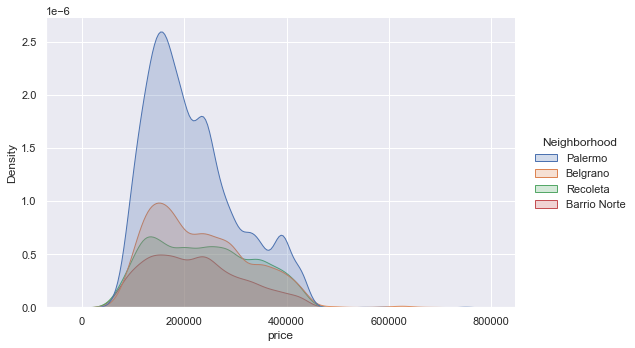

In [48]:
sns.displot(data=top4_barrios_precio, x='price', hue='Neighborhood', kind='kde', fill=True, height=5, aspect=1.5)

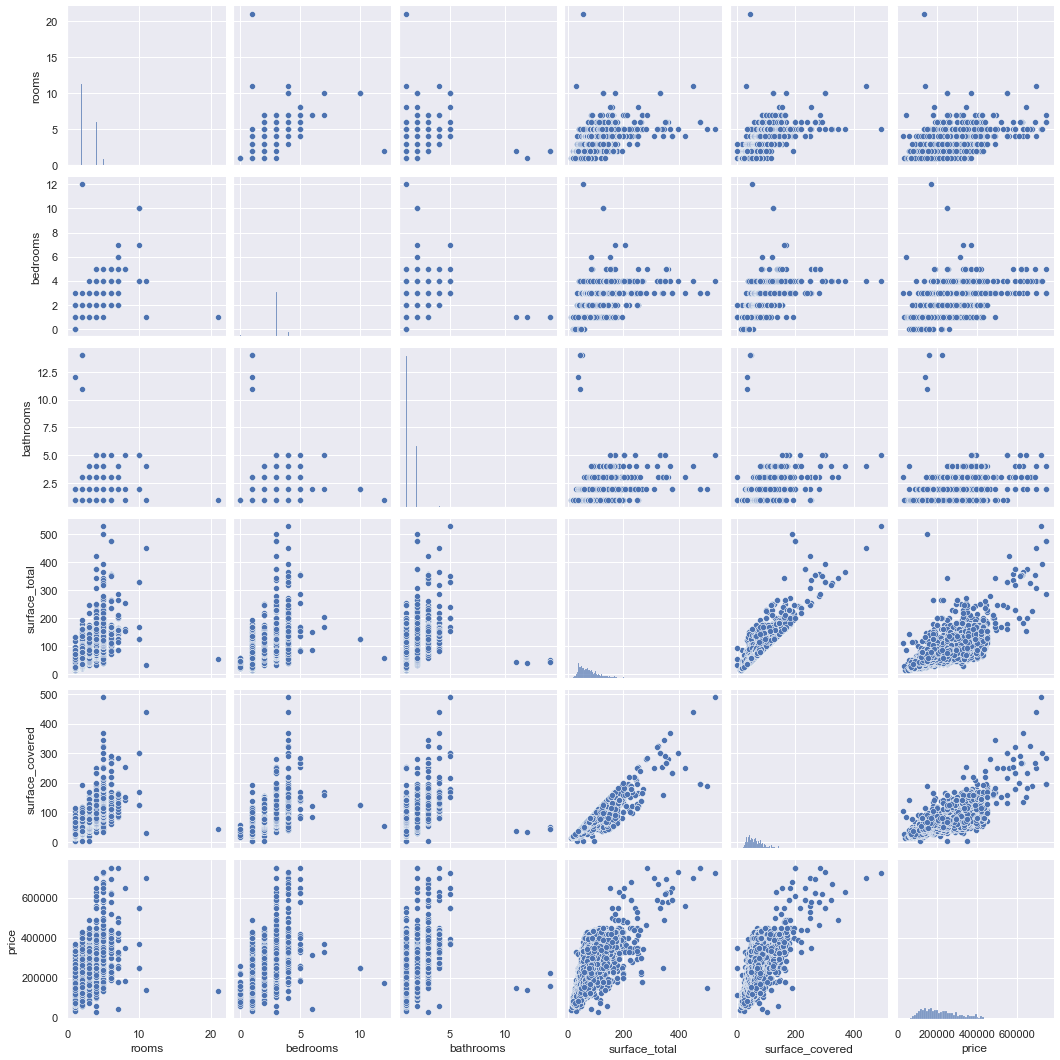

In [49]:
sns.pairplot(top4_barrios_precio)

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

In [50]:
dataset_clear.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,Neighborhood
1,2.0,1.0,2.0,70.0,58.0,159000.0,PH,Boedo
2,2.0,1.0,1.0,45.0,45.0,125000.0,PH,Palermo
3,2.0,1.0,1.0,85.0,50.0,295000.0,PH,Palermo
5,2.0,1.0,1.0,56.0,56.0,150000.0,PH,Villa Crespo
6,2.0,1.0,1.0,70.0,70.0,159500.0,PH,Villa Crespo


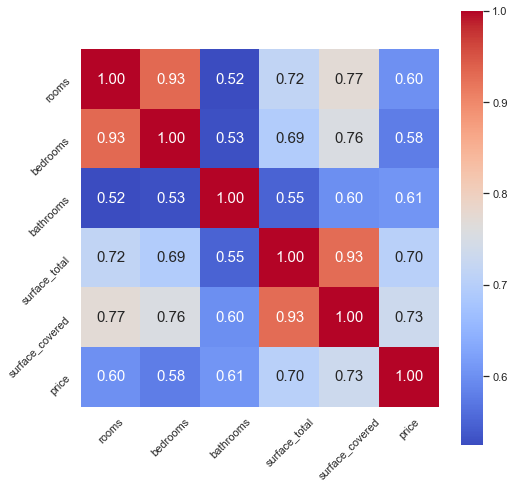

In [51]:
#Mapa de calor de las variables numericas
corr = dataset_clear.drop(columns = ['property_type', 'Neighborhood']).corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= dataset_clear.drop(columns = ['property_type', 'Neighborhood']).columns,
           yticklabels= dataset_clear.drop(columns = ['property_type', 'Neighborhood']).columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

#Se puede analizar que las mejores variables para predecir el precio (más cerca de 1) son surface_total y surface_covered
#Si comparamos con el primer mapa de calor que se graficamos, esas eran las variables que tenian los valores más bajo (más cerca de 0)
#Y luego de realizar un filtrado de sus outliers, podemos analizar que son las mejores variables para predecir el precio

<AxesSubplot:title={'center':'Relación entre precio y superficie cubierta en una casa'}, xlabel='price', ylabel='surface_covered'>

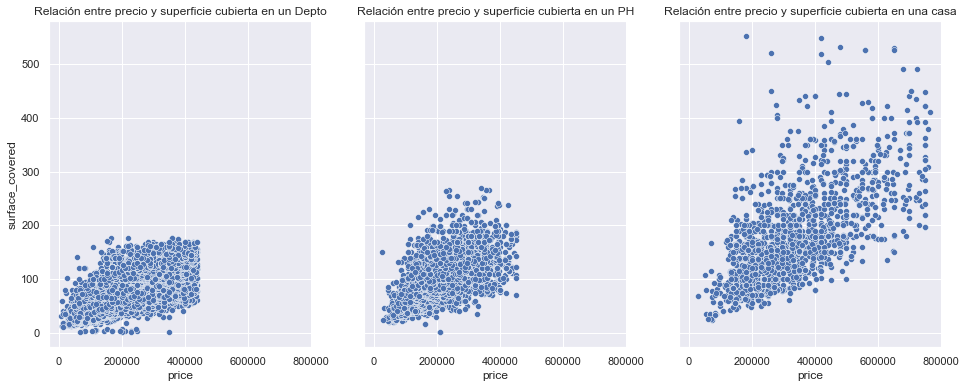

In [52]:
#Graficos de la relación de superficie total y precio según los tipos de propiedad 
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(16,6), sharex=True, sharey=True)

ax1.set_title('Relación entre precio y superficie cubierta en un Depto')
dataset_clear_ph = dataset_clear[dataset_clear['property_type'] == 'Departamento']
sns.scatterplot(x="price", y="surface_covered", data = dataset_clear_ph, ax=ax1)

ax2.set_title('Relación entre precio y superficie cubierta en un PH')
dataset_clear_casa = dataset_clear[dataset_clear['property_type'] == 'PH']
sns.scatterplot(x="price", y="surface_covered", data = dataset_clear_casa, ax=ax2)


ax3.set_title('Relación entre precio y superficie cubierta en una casa')
dataset_clear_depto = dataset_clear[dataset_clear['property_type'] == 'Casa']
sns.scatterplot(x="price", y="surface_covered", data = dataset_clear_depto, ax=ax3)

#Podemos analizar que las casas tienen mayor superficie cubierta y precios más elevados, hasta 800.000USD
#Mientras que los precios de Deptos y PH están distribuidos hasta los 400.000USD

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


In [53]:
#Cuál es el barrio más caro y el más barato de Capital Federal?
#Cuál es la media de cada tipo de propiedad en el barrio más caro? Y en el barrio más barato?
#Ej: El mismo tipo de propiedad (por ejemplo: Una casa) cuánto sale en el barrio más caro? Y en barrio más barato?
#Que influye más en el precio, el tipo de propiedad o la ubicación?

Text(0.5, 0, 'Barrio de Capital Federal')

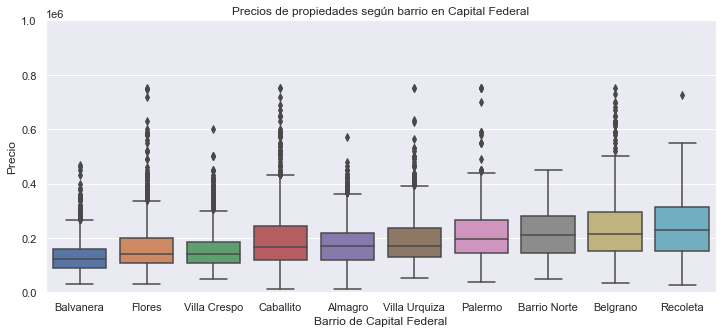

In [54]:
#Cuál es el barrio más caro y el barrio más barato en Capital Federal? 

#Se grafican solamente los barrios con mayor concentración de propiedades dentro de Capital Federal
#Ordenados de menor valor de media, a mayor valor de media.
dataset_clear_mayor = dataset_clear[dataset_clear["Neighborhood"].isin(lista_barrios)]
grouped = dataset_clear_mayor.loc[:,['Neighborhood', 'price']] \
    .groupby(['Neighborhood']) \
    .median() \
    .sort_values(by='price')
plt.figure(figsize=(12,5)) 
sns.boxplot(data = dataset_clear_mayor, x = 'Neighborhood', y = 'price', order=grouped.index)
plt.ylim(0,1000000)
plt.title('Precios de propiedades según barrio en Capital Federal')
plt.ylabel('Precio')
plt.xlabel('Barrio de Capital Federal')

In [55]:
#Según el gráfico anterior podemos analizar que Balvanera es el barrio más barato y Recoleta es el barrio más caro

(0.0, 1000000.0)

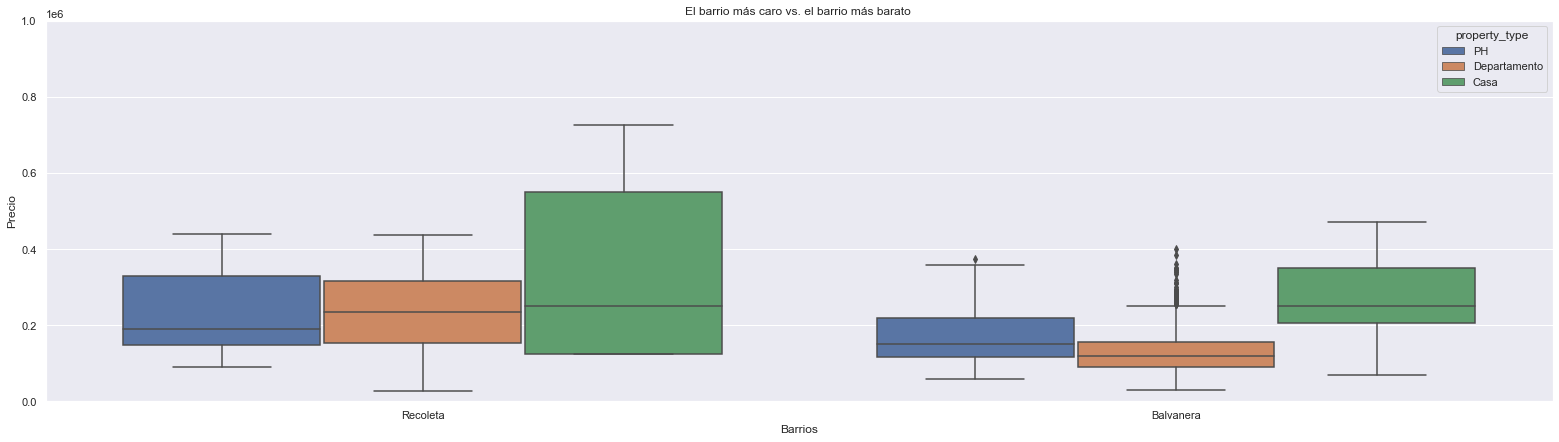

In [56]:
#Se compara Balvanera y Recoleta según el tipo de propiedad
barrios_extremos = ['Balvanera', 'Recoleta']
set_barrios_extremos = dataset_clear[dataset_clear["Neighborhood"].isin(barrios_extremos)]

plt.figure(figsize=(27,7))
plt.title('El barrio más caro vs. el barrio más barato ')
ax = sns.boxplot(x="Neighborhood", y="price", hue="property_type",
                 data=set_barrios_extremos)
plt.xlabel('Barrios')
plt.ylabel('Precio')
plt.ylim(0,1000000)

In [57]:
#Se analizan los precios en Balvanera 

set_balvanera = dataset_clear[dataset_clear["Neighborhood"] == 'Balvanera']
balvanera_ph = set_balvanera[set_balvanera['property_type'] == 'PH']
balvanera_casa = set_balvanera[set_balvanera['property_type'] == 'Casa']
balvanera_depto = set_balvanera[set_balvanera['property_type'] == 'Departamento']

balvanera_depto.describe()
#media del precio de un PH en Balvanera -> 175.163
#media del precio de un Depto en Balvanera -> 130.062
#media del precio de una Casa en Balvanera -> 271.421

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,1957.000000,1957.000000,1922.000000,1957.000000,1957.000000,1957.000000
mean,2.705672,1.778743,1.229448,62.451201,58.282575,130062.201840
std,1.005727,0.860754,0.490309,27.129702,25.131706,56934.236794
min,1.000000,0.000000,1.000000,15.000000,8.000000,30000.000000
25%,2.000000,1.000000,1.000000,42.000000,40.000000,89000.000000
50%,3.000000,2.000000,1.000000,56.000000,53.000000,120000.000000
75%,3.000000,2.000000,1.000000,75.000000,70.000000,155000.000000
max,8.000000,7.000000,4.000000,175.000000,161.000000,400000.000000


In [58]:
#Se analizan los precios en Recoleta 

set_recoleta = dataset_clear[dataset_clear["Neighborhood"] == 'Recoleta']
recoleta_ph = set_recoleta[set_recoleta['property_type'] == 'PH']
recoleta_casa = set_recoleta[set_recoleta['property_type'] == 'Casa']
recoleta_depto = set_recoleta[set_recoleta['property_type'] == 'Departamento']

recoleta_depto.describe()
#media del precio PH en Recoleta -> 228.051
#media del precio Depto en Recoleta -> 237.500
#media del precio Casa en Recoleta -> 355.000

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,3678.000000,3678.000000,3641.000000,3678.000000,3678.000000,3678.000000
mean,2.792007,1.829799,1.459489,76.743067,71.177814,237500.487493
std,1.128642,0.812510,0.695408,35.011309,32.425525,97727.648977
min,1.000000,0.000000,1.000000,16.000000,16.000000,28000.000000
25%,2.000000,1.000000,1.000000,46.000000,42.000000,152000.000000
50%,3.000000,2.000000,1.000000,75.000000,70.000000,235000.000000
75%,4.000000,2.000000,2.000000,101.000000,94.000000,315000.000000
max,21.000000,7.000000,14.000000,177.000000,170.000000,438000.000000


In [59]:
#Se puede analizar que:
#En Recoleta el valor medio de una Casa es 355.000 y en Balvanera el valor medio de Casa es 271.421
#Es decir, que en el precio influye más la ubicación que su tipo. 
#Ya que el mismo tipo de propiedad varia mucho su precio según su ubicación.

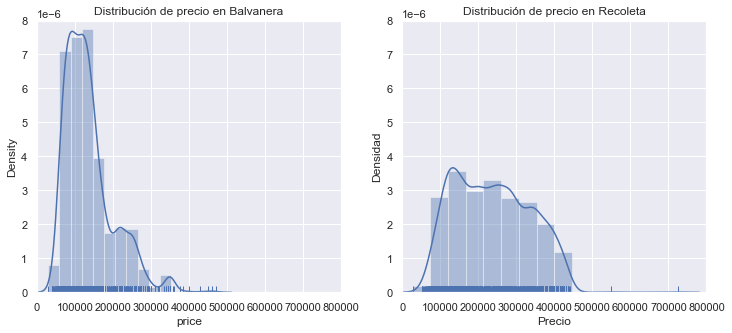

In [60]:
#Se grafica la distribución del precio en esos 2 barrios
warnings.filterwarnings("ignore")
plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)
barrios_extremos = ['Balvanera', 'Recoleta']
i = 0
for barrio in barrios_extremos:
    i = i + 1
    plt.subplot(1,2,i)
    dataset = dataset_clear[dataset_clear["Neighborhood"] == barrio]
    sns.distplot(dataset['price'], bins = 15, hist = True, kde = True, rug = True)
    plt.title('Distribución de precio en ' + barrio)
    plt.ylim(0,0.000008)
    plt.xlim(0,800000)
plt.xlabel('Precio')
plt.ylabel('Densidad')
plt.show()

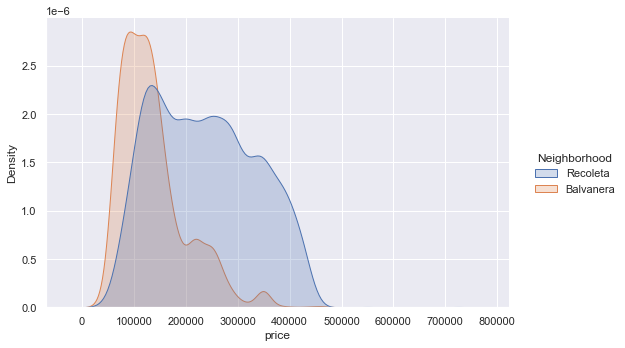

In [61]:
#Se grafica la distribución del precio en esos 2 barrios
sns.displot(data=set_barrios_extremos, x='price', hue='Neighborhood', kind='kde', fill=True, height=5, aspect=1.5)

In [62]:
#Podemos analizar que Recoleta tiene una distribución del precio más uniforme entre 100.000 y 400.000 USD
#En cambio en Balvanera, la mayor densidad de propiedades se concentran en un precio de 100.000 y 200.000 USD

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

In [63]:
#Importamos el dataset
dataset = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

In [64]:
#Tamaño inicial del dataset
dataset.shape

(146660, 19)

In [65]:
#Comenzamos con el filtrado de los datos:
#Se filtra por los 3 tipos de propiedad con mayor cantidad de propiedades
listal3 = ['Departamento', 'PH', 'Casa']
dataset = dataset[dataset['property_type'].isin(listal3)]
dataset.shape

(143145, 19)

In [66]:
#Se filtra por el Estado con mayor cantidad de propiedades
dataset = dataset[dataset['l2'] == 'Capital Federal']
dataset.shape

(91485, 19)

In [67]:
#Se filtra por un rango de superficie total menor a 1000 y mayor a 15
dataset = dataset[(dataset['surface_total'] <= 1000) & (dataset['surface_total'] >= 15)]
dataset.shape

(82405, 19)

In [68]:
#Se filtra por un precio menor o igual a 4.000.000 
dataset = dataset[dataset['price'] <= 4000000]
dataset.shape

(82373, 19)

In [69]:
#Se filtran solo las columnas que vamos a utilizar para predecir
dataset = dataset[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']]

In [70]:
#Se filtran los valores nulos
dataset = dataset.dropna()

In [71]:
#Tamaño del dataset luego del filtrado
dataset.shape

(81019, 6)

In [72]:
dataset.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,7.0,7.0,2.0,140.0,140.0,153000.0
1,2.0,1.0,2.0,70.0,58.0,159000.0
2,2.0,1.0,1.0,45.0,45.0,125000.0
3,2.0,1.0,1.0,85.0,50.0,295000.0
5,2.0,1.0,1.0,56.0,56.0,150000.0


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix

In [74]:
#BENCHMARK: REGRESION LINEAL
X = dataset[['rooms','bedrooms','bathrooms','surface_total','surface_covered']]
y = dataset[['price']]

#Realizamos un Train/Test split de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

#Generamos un modelo de regresión lineal
linear_model = LinearRegression()
#Entrenamos el modelo con los datos de Train
linear_model.fit(X_train, y_train)

#Evaluamos nuestro modelo
print("Score de mi Modelo Lineal:")
print(" - Score en Train:",linear_model.score(X_train, y_train))
print(" - Score en Test:",linear_model.score(X_test, y_test))

(56713, 5) (56713, 1) (24306, 5) (24306, 1)
Score de mi Modelo Lineal:
 - Score en Train: 0.5517887107017188
 - Score en Test: 0.55148643587972


Modelo Lineal:
Raíz del error cuadrático medio en Train: 199173.83253528475
Raíz del error cuadrático medio en Test: 202449.36540361578


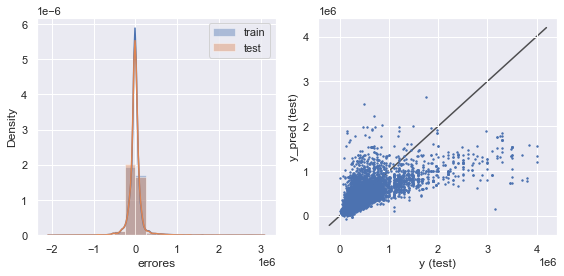

In [75]:
#Metrica de evaluación elegida -> RMSE
#Evaluación de la métrica elegida en el conjunto de Test y en el conjunto de Train del Benchmark 
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)
    
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('Modelo Lineal:')
print('Raíz del error cuadrático medio en Train:', rmse_train)
print('Raíz del error cuadrático medio en Test:', rmse_test)
    
plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2) 
lims = [np.min([ax.get_xlim(), ax.get_ylim()]),np.max([ax.get_xlim(), ax.get_ylim()])]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

In [76]:
#MIS MODELOS:

In [77]:
#Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
#Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué?
#Ser crítico/a con la metodología utilizada. Por ejemplo, responde las siguientes preguntas:
# - ¿Qué información no estás usando que podría ayudar al modelo?
# - ¿Qué información puede estar demás o repetida?

In [78]:
#Seleccionar las variables predictoras (X) y la variable a predecir (y).
X = dataset[['rooms','bedrooms','bathrooms','surface_total','surface_covered']]
y = dataset[['price']]

In [79]:
X

,rooms,bedrooms,bathrooms,surface_total,surface_covered
0,7.0,7.0,2.0,140.0,140.0
1,2.0,1.0,2.0,70.0,58.0
2,2.0,1.0,1.0,45.0,45.0
3,2.0,1.0,1.0,85.0,50.0
5,2.0,1.0,1.0,56.0,56.0
...,...,...,...,...,...
146554,4.0,3.0,3.0,175.0,111.0
146555,3.0,2.0,2.0,144.0,134.0
146556,4.0,2.0,2.0,317.0,143.0
146557,3.0,2.0,2.0,145.0,145.0


In [80]:
y

,price
0,153000.0
1,159000.0
2,125000.0
3,295000.0
5,150000.0
...,...
146554,570000.0
146555,480000.0
146556,530000.0
146557,420000.0


In [81]:
#Realizar un Train/Test split de los datos.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print("X train:",X_train.shape)
print("X test:",X_test.shape)
print("y train:",y_train.shape)
print("y test:",y_test.shape)

X train: (56713, 5)
X test: (24306, 5)
y train: (56713, 1)
y test: (24306, 1)


In [118]:
#Definir un modelo de vecinos más cercanos y un modelo de árbol de decisión
tree_regressor = DecisionTreeRegressor(max_depth=7)
knn_regressor = KNeighborsRegressor(n_neighbors=3)

In [119]:
#Entrenar ambos modelos
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [120]:
#Evaluar el score en Train y Test de ambos modelos
print("Score en Arbol de Decision:")
print(" - Score en Train:",tree_regressor.score(X_train, y_train))
print(" - Score en Test:",tree_regressor.score(X_test, y_test))
print("--------------")
print("Score en Vecinos más Cercanos:")
print(" - Score en Train:",knn_regressor.score(X_train, y_train))
print(" - Score en Test:",knn_regressor.score(X_test, y_test))

Score en Arbol de Decision:
 - Score en Train: 0.7484877712415552
 - Score en Test: 0.7162201674400078
--------------
Score en Vecinos más Cercanos:
 - Score en Train: 0.8782558355018295
 - Score en Test: 0.7461108240704453


In [121]:
#Modelo de Vecinos más Cercanos tiene el mayor Score: 0.87 en Train y 0.74 en Test
# - El Modelo de Benchmark (Regresión Lineal) -> tiene un score Score en Test y Train de 0.55
# - El Modelo de Arbol de Decisión ->  tiene 0.74 en Train y 0.71 en Test

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 149200.5546128596
Raíz del error cuadrático medio en Test: 161034.67198466905


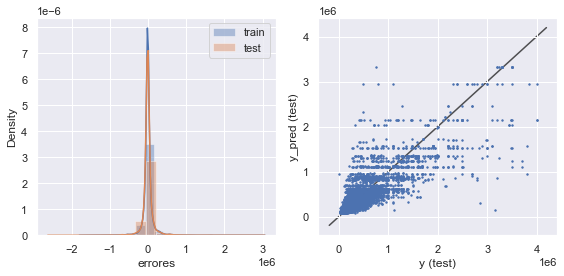

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 103804.20852724434
Raíz del error cuadrático medio en Test: 152317.82229037234


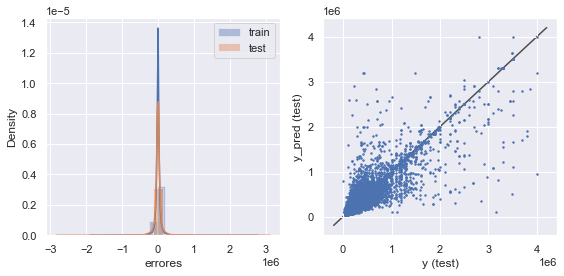

In [123]:
#Metrica de evaluación elegida -> RMSE
#Evaluación de la métrica elegida en el conjunto de Test y en el conjunto de Train. 
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_train_pred = y_train_pred.reshape(56713,1)
    y_test_pred = model.predict(X_test)   
    y_test_pred = y_test_pred.reshape(24306,1)
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

In [88]:
#A continuación se detalla el análisis para obtener los mejores hiperparametros:

In [89]:
#BENCHMARK:
# - Modelo Lineal:
   #Raíz del error cuadrático medio en Train: 199.173
   #Raíz del error cuadrático medio en Test: 202.449

In [90]:
#MIS MODELOS (sin hiperparametros):
# - Árbol de Decisión
   #Raíz del error cuadrático medio en Train: 191.783
   #Raíz del error cuadrático medio en Test: 194.688
# - Vecinos más cercanos
   #Raíz del error cuadrático medio en Train: 77.925
   #Raíz del error cuadrático medio en Test: 161.757

In [91]:
#MIS MODELOS (con hiperparametros knn=5, arb=5):
# - Árbol de Decisión
   #Raíz del error cuadrático medio en Train: 169.200
   #Raíz del error cuadrático medio en Test: 174.352
# - Vecinos más cercanos
   #Raíz del error cuadrático medio en Train: 121.300
   #Raíz del error cuadrático medio en Test: 155.040

In [92]:
#MIS MODELOS (con hiperparametros knn=3, arb=7) -> EL MEJOR
# - Árbol de Decisión
   #Raíz del error cuadrático medio en Train: 149.200
   #Raíz del error cuadrático medio en Test: 161.063
# - Vecinos más cercanos
   #Raíz del error cuadrático medio en Train: 103.804
   #Raíz del error cuadrático medio en Test: 152.317

In [93]:
#Según los datos anteriores, podemos analizar que los hiperparametros más óptimos son:
# - En Arbol de decisión -> una profundidad = 7 
# - En el modelo de Vecinos más cercano -> un knn = 3
#Se obtiene una raíz de error cuadrático medio en Train y Test más bajas, en comparación al Benchmark.

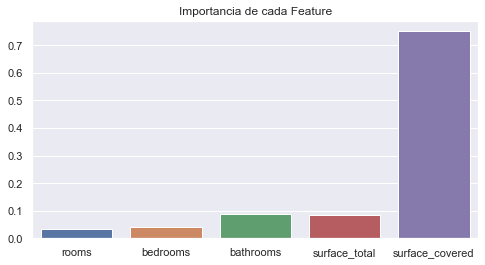

In [153]:
#La feature más importante en el Arbol de Decisión:
#Es 'surface_covered' como analizamos anteriormente en el Análisis Exploratorio de Datos.
importances = tree_regressor.feature_importances_
columns = X.columns
plt.figure(figsize=(8,4)) 
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.show()

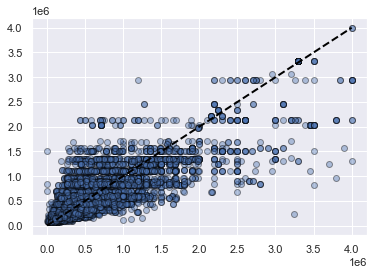

In [154]:
#Grafico de valores reales vs. valores predichos en Train -> Arbol de Decision 
y_train_pred_tree = tree_regressor.predict(X_train)

plt.scatter(x = y_train, y = y_train_pred_tree, edgecolors=(0, 0, 0), alpha = 0.4)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)

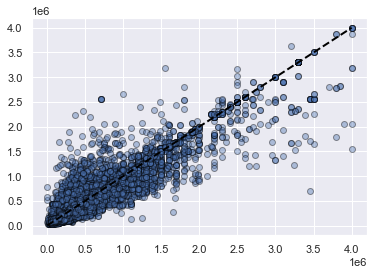

In [155]:
#Grafico de valores reales vs. valores predichos en Train -> Vecinos más Cercanos
y_train_pred_knn = knn_regressor.predict(X_train)

plt.scatter(x = y_train, y = y_train_pred, edgecolors=(0, 0, 0), alpha = 0.4)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)

In [156]:
# Según los datos obtenidos con la métrica RMSE:
#  - Árbol de Decisión : Raíz del error cuadrático medio en Train: 149.200
#  - Vecinos más cercanos: Raíz del error cuadrático medio en Train: 103.804
# Podemos analizar en los gráficos anteriores que el modelo de Vecinos más cercanos tiene más tendencia a simular la recta
# Por lo que concretamos el análisis de que el modelo más óptimo para utilizar es el modelo de Vecinos más Cercanos.